In [1]:
import numpy as np
import pickle
import os
import sys
import importlib

In [2]:
util_path = 'C:/ASM/Dropbox/Developments/Jupyter/Eating/myutils' if 'C:' in os.getcwd() else './myutils'
sys.path.append(util_path)
import my_file_utils as mfileu
import Meal_Window_Generation_Utils as mwgenu
import my_data_process_utils as mdpu
import my_feature_utils as mfeatu
importlib.reload(mwgenu)
importlib.reload(mfeatu)

<module 'my_feature_utils' from 'C:/ASM/Dropbox/Developments/Jupyter/Eating/myutils\\my_feature_utils.py'>

In [3]:
hand = 'right'
ds = mfileu.read_file('data', 'free_data_steven_'+hand+'.pkl')
annots = mfileu.read_file('data', 'free_data_steven_annots.pkl')

In [5]:
win_size, neg_step, pos_step = 5*16, 8, 8
ixs = mwgenu.get_train_window_indices_all(ds, annots, win_size=win_size, neg_step=neg_step, pos_step=pos_step, blockPrint=True)
print("All Shapes window, labels: ", ixs.shape, np.sum(ixs[:,4]==0), np.sum(ixs[:,4]==1), np.sum(ixs[:,4]==2), np.sum(ixs[:,4]==3))

All Shapes window, labels:  (1722773, 5) 1571373 98796 28731 23873


In [13]:
ixf = ixs[(ixs[:, -1]<=1), :]
print("All Shapes window, labels: ", ixf.shape, np.sum(ixf[:,4]==0), np.sum(ixf[:,4]==1), np.sum(ixf[:,4]==2), np.sum(ixf[:,4]==3))

All Shapes window, labels:  (1670169, 5) 1571373 98796 0 0


In [ ]:
#windows = mwgenu.get_window_data(ds, ixf, win_size=win_size)
#print(windows.shape)

In [14]:
v = mfeatu.get_variance_accel(ds, ixf, win_size=win_size)
gx = mfeatu.get_grav_x(ds, ixf, index_offset=win_size//2)

(1571373,) (98796,)
(899791,) (78293,)
(296883,) (49106,)


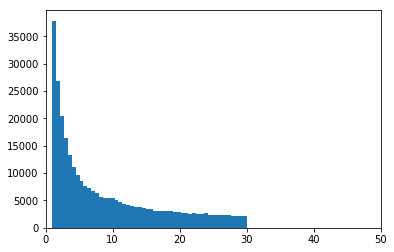

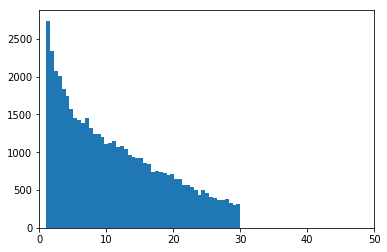

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

vn = v[ixf[:, -1]==0]
vp = v[ixf[:, -1]>0]
print(vn.shape, vp.shape)

gxn =gx[ixf[:, -1]==0] 
gxp = gx[ixf[:, -1]>0]
vn = vn[(gxn<=-0)]
vp = vp[(gxp<=-0)]
print(vn.shape, vp.shape)

vn = vn[(vn>=1) & (vn<=30)]
vp = vp[(vp>=1) & (vp<=30)]
print(vn.shape, vp.shape)

plt.hist(vn, bins=50)
plt.xlim([0, 50])
plt.show()
plt.hist(vp, bins=50)
plt.xlim([0, 50])
plt.show()